# Data Analysis and Modelling Seattle Cycle Sharing

In this data analysis we're looking into data about the Seattle cycle share project. It consists of several related datasets, one about stations, one about trips and one about weather.

In this data analysis i'll focus on the relation between weather and number of trips. I have the hypothesis that bad weather means fewer trips and good weather means more. Let's see!

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

First we load the weather data:

In [2]:
df_weather = pd.read_csv('weather.csv', index_col='Date', parse_dates=['Date'])
df_weather.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


Then we load the trip data:

In [3]:
df_trips = pd.read_csv('trip.csv', index_col='trip_id', parse_dates=['starttime', 'stoptime'])
df_trips.head()

,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
trip_id,,,,,,,,,,,
431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


I'm extracting the date of each trip as a separate variable, i want to use that to calculate trips per day and join this dataset with the weather data.

In [4]:
import datetime

df_trips['date'] = df_trips['starttime'].apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day).isoformat())

Now i'm going to calculate the number of trips per day, using groupby function of a dataframe.

In [5]:
trips_per_day = df_trips[['date']].groupby(['date']).size().reset_index(name='counts')
trips_per_day = trips_per_day.set_index('date')
trips_per_day.head()

,counts
date,
2014-10-13,409
2014-10-14,491
2014-10-15,313
2014-10-16,395
2014-10-17,294


Next step is joining the weather data with the trips_per_day data.

In [6]:
df_combined = df_weather.join(trips_per_day)

df_combined.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,counts
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,29.65,10,10,4,13,4,21,0.00,Rain,409
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,29.54,10,9,3,10,5,17,0.11,Rain,491
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,29.51,10,9,3,18,7,25,0.45,Rain,313
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,29.81,10,10,10,9,4,-,0.00,Rain,395
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,29.73,10,10,6,8,3,-,0.14,Rain,294


## Plotting data

Now that we have prepared one DataFrame with all the relevant data (weather, trips-per-day) we can make some plots and investigate possible relations.

Having a manual look at relations helps understand if there are patterns to the data (correlation, negative/positive, etc ...). Which tells us if a machine learning algorithm will be able to learn from the data.

First we'll look at temparature vs trips:

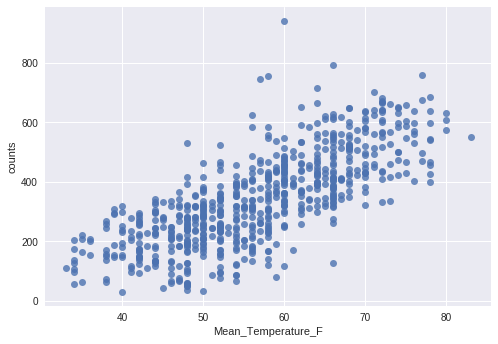

In [7]:
import seaborn as sns

sns.regplot(x="Mean_Temperature_F", y="counts", data=df_combined, fit_reg=False)

So there appears to be a positive relation between temparature and number of trips. That's promising!

Second i'm going to look at humidity.

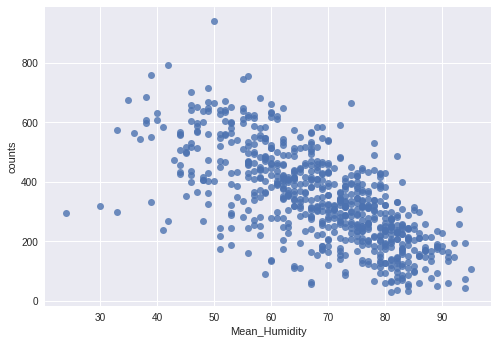

In [8]:
sns.regplot(x="Mean_Humidity", y="counts", data=df_combined, fit_reg=False)

Humidity has a negative relation. It looks pretty clear, so also a good predictor!

Next i also think there is a relation with the day of the week, perhaps weekdays are busier than weekend or vice-versa. Let's add the feature and check?

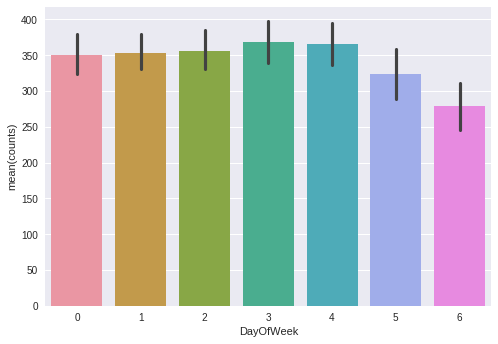

In [9]:
df_combined['DayOfWeek'] = df_combined.index.map(lambda x: x.weekday)

sns.barplot(x="DayOfWeek", y="counts", data=df_combined)

## Machine learning model

So we've have a look at the data and seen that there are some interesting patterns.  We're now ready to try some machine learning!

In [10]:
X = df_combined[["Mean_Temperature_F", "Mean_Humidity", "DayOfWeek"]]
y = df_combined['counts']

Unfortunately there is some "N/A" or empty values in the dataset. We'll need to fill them in, in this case i'm just going to put the mean of each column in there.

In [11]:
X = X.fillna(X.mean())

Now we're ready for training a model!

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=10, min_samples_leaf=5)

Let's train and evaluate the model - see how it does!

In [20]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=5))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.70 (0.05)
